<a href="https://colab.research.google.com/github/pab10dm/pab10dm/blob/main/Ejercicio2avion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms alfa alfa_p fi fi_p fi_pp h h_p a b c u omega;  
alfa, alfa_p, fi, fi_p, fi_pp, h, h_p, a, b, c, u, omega=symbols('alfa alfa_p fi fi_p fi_pp h h_p a b c u omega')
# alfa_p=a*(fi-alfa);  
Eq1=Eq(alfa_p-a*(fi-alfa),0)
#%fi_pp=-(omega**2)(fi-alfa-b*u); 
Eq2=Eq(fi_pp+(omega**2)*(fi-alfa-b*u),0)
#%h_p=c*alfa;
Eq3=Eq(h_p-c*alfa,0)
sol = solve((Eq1, Eq2, Eq3),(alfa_p, fi_pp, h_p))
# print(sol)
alfa_p=sol[alfa_p]
fi_pp=sol[fi_pp]
h_p=sol[h_p]
print('alfa_p final es')
print(alfa_p)
print('fi_pp final es')
print(fi_pp)
print('h_p final es')
print(h_p)

alfa_p final es
-a*alfa + a*fi
fi_pp final es
alfa*omega**2 + b*omega**2*u - fi*omega**2
h_p final es
alfa*c


$\begin{equation*}
\begin{cases}
\dot{\alpha} = {-a \cdot {\alpha}+a \cdot {\phi}} \\
\ddot{\phi} = {{\alpha} \cdot {\omega}^2 + b \cdot {\omega}^2 \cdot u- \phi \cdot {\omega}^2 } \\
\dot{h} = c \cdot {\alpha}
\end{cases}
\end{equation*}$



**De esta manera tenemos las matrices**

A=$[-a,a,0,0\\
0,0,1,0\\
\omega^2,-\omega^2,0,0\\
c,0,0,0
]$

B=$[0 \\
    0 \\
    b \cdot \omega^2 \\
    0
]$ 



In [2]:
Mat_A=[[diff(alfa_p, alfa).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(alfa_p, fi).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(alfa_p, fi_p).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(alfa_p, h).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0)],
  [0,0,1,0],
  [diff(fi_pp, alfa).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(fi_pp, fi).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(fi_pp, fi_p).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0),
  diff(fi_pp, h).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0)],
  [c,0,0,0]]
Mat_B=[[0],[0],
 [diff(fi_pp, u).subs(alfa,0).subs(fi,0).subs(fi_p,0).subs(h,0)],
 [0]]
print(Mat_A)
print(Mat_B)
pretty_print(Mat_A)
pretty_print(Mat_B)

[[-a, a, 0, 0], [0, 0, 1, 0], [omega**2, -omega**2, 0, 0], [c, 0, 0, 0]]
[[0], [0], [b*omega**2], [0]]
⎡                             ⎡ 2    2      ⎤              ⎤
⎣[-a, a, 0, 0], [0, 0, 1, 0], ⎣ω , -ω , 0, 0⎦, [c, 0, 0, 0]⎦
⎡          ⎡   2⎤     ⎤
⎣[0], [0], ⎣b⋅ω ⎦, [0]⎦


Simulación del sistema lineal con los siguientes parámetros,  ω =0,2; a=0,01; b=0,2; c=100m/s (360Km/h);  Δ t= 1e−3 ; y el tiempo de simulación de 5 segundos.

Text(0.5, 0, 'Tiempo (seg.)')

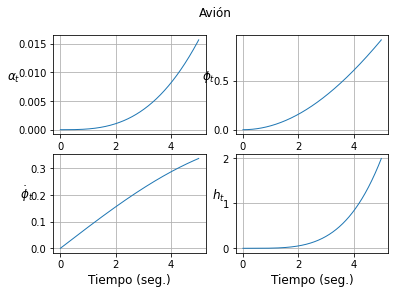

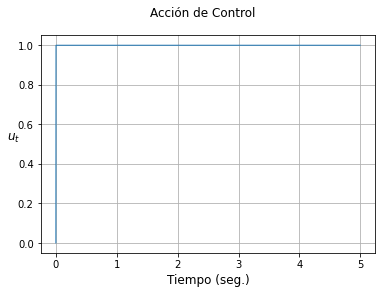

In [3]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
omega=0.2;a=0.01;b=2;c=100;
##%            estado=[alfa(i); fi(i); fi_p(i); h(i)]
##Mat_A=[-a a 0 0; 0 0 1 0; omega^2 -omega^2 0 0; c 0 0 0];
##Mat_B=[0; 0; (omega^2)*b; 0]
Dt=1e-3;t_simul=5; #Tiene que ser muy pequeño para que se vea que coinciden
Mat_A=np.array([[ -a, a, 0. ,0.],[0., 0., 1., 0.],[omega**2, -omega**2 , 0. ,0.],[c, 0.,0.,0.]])
Mat_B=np.array([[0.],[0.],[(omega**2)*b],[0.]])
alfa=np.linspace(0,0,int(t_simul/Dt))
fi=np.linspace(0,0,int(t_simul/Dt))
fi_p=np.linspace(0,0,int(t_simul/Dt))
h=np.linspace(0,0,int(t_simul/Dt))
u=np.linspace(0,0,int(t_simul/Dt))
alfa_O=np.linspace(0,0,int(t_simul/Dt))
fi_O=np.linspace(0,0,int(t_simul/Dt))
h_O=np.linspace(0,0,int(t_simul/Dt))
t=np.linspace(0,0,int(t_simul/Dt))
alfa[0]=0.
fi[0]=0.
fi_p[0]=fi[0]
h[0]=0.
u[0]=0.
estado=[[alfa[0]], [fi[0]], [fi_p[0]], [h[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/Dt)-1):    
    u[ii+1]=1.
    alfa_p=(-a*alfa[ii])+(a*fi[ii])   
    fi_pp=(alfa[ii]*(omega**2))+(b*(omega**2)*u[ii+1])-(fi[ii]*(omega**2))
    h_p=c*alfa[ii]
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii]     
    x_hat = x_hat + Dt*x_hatp;    
    fi_p[ii+1]=fi_p[ii]+Dt*fi_pp;
    fi[ii+1]  =fi[ii]+Dt*fi_p[ii];
    alfa[ii+1]=alfa[ii]+Dt*alfa_p;
    h[ii+1]   =h[ii]+Dt*h_p;
    t[ii] = ii*Dt
    estado=[[alfa[ii+1]], [fi[ii+1]], [fi_p[ii+1]], [h[ii+1]]]
    alfa_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    fi_O[ii+1]=x_hat[0]
t[ii+1] = ii*Dt
u[ii+1]=1.

fig, axs = plt.subplots(2,2)
fig.suptitle('Avión')
axs[0,0].plot(t, alfa, linewidth =1.0)
axs[0,0].grid( True )
axs[0,0].set_ylabel(r'$\alpha_t$',rotation=0, fontsize=12) 

axs[0,1].plot(t, fi, linewidth =1.0)
axs[0,1].grid( True )
axs[0,1].set_ylabel('$\phi_t$',rotation=0, fontsize=12)

axs[1,0].plot(t, fi_p, linewidth =1.0)
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\dot{\phi}_t$',rotation=0, fontsize=12) 
axs[1,0].set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)

axs[1,1].plot(t, h, linewidth =1.0)
axs[1,1].grid( True )
axs[1,1].set_ylabel('$h_t$',rotation=0, fontsize=12)
axs[1,1].set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)

#Acción de control
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Acción de Control')
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12) 
ax1.set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)

**Simulación ahora con c=50m/s (180Km/h);$\Delta$t=$1e^-3$; y el tiempo de simulación de 20 segundos.**

Text(0.5, 0, 'Tiempo (seg.)')

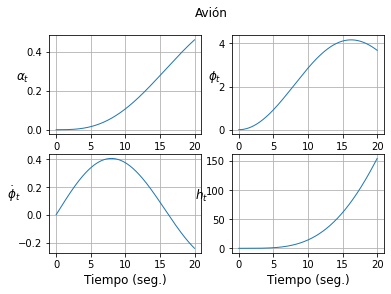

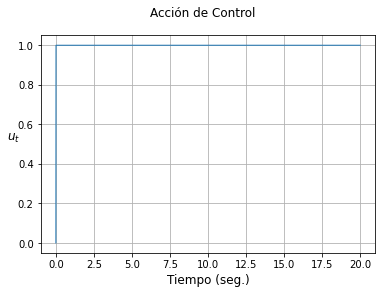

In [4]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
omega=0.2;a=0.01;b=2;c=50;
##%            estado=[alfa(i); fi(i); fi_p(i); h(i)]
##Mat_A=[-a a 0 0; 0 0 1 0; omega^2 -omega^2 0 0; c 0 0 0];
##Mat_B=[0; 0; (omega^2)*b; 0]
Dt=1e-3;t_simul=20; #Tiene que ser muy pequeño para que se vea que coinciden
Mat_A=np.array([[ -a, a, 0. ,0.],[0., 0., 1., 0.],[omega**2, -omega**2 , 0. ,0.],[c, 0.,0.,0.]])
Mat_B=np.array([[0.],[0.],[(omega**2)*b],[0.]])
alfa=np.linspace(0,0,int(t_simul/Dt))
fi=np.linspace(0,0,int(t_simul/Dt))
fi_p=np.linspace(0,0,int(t_simul/Dt))
h=np.linspace(0,0,int(t_simul/Dt))
u=np.linspace(0,0,int(t_simul/Dt))
alfa_O=np.linspace(0,0,int(t_simul/Dt))
fi_O=np.linspace(0,0,int(t_simul/Dt))
h_O=np.linspace(0,0,int(t_simul/Dt))
t=np.linspace(0,0,int(t_simul/Dt))
alfa[0]=0.
fi[0]=0.
fi_p[0]=fi[0]
h[0]=0.
u[0]=0.
estado=[[alfa[0]], [fi[0]], [fi_p[0]], [h[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/Dt)-1):    
    u[ii+1]=1.
    alfa_p=(-a*alfa[ii])+(a*fi[ii])   
    fi_pp=(alfa[ii]*(omega**2))+(b*(omega**2)*u[ii+1])-(fi[ii]*(omega**2))
    h_p=c*alfa[ii]
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii]     
    x_hat = x_hat + Dt*x_hatp;    
    fi_p[ii+1]=fi_p[ii]+Dt*fi_pp;
    fi[ii+1]  =fi[ii]+Dt*fi_p[ii];
    alfa[ii+1]=alfa[ii]+Dt*alfa_p;
    h[ii+1]   =h[ii]+Dt*h_p;
    t[ii] = ii*Dt
    estado=[[alfa[ii+1]], [fi[ii+1]], [fi_p[ii+1]], [h[ii+1]]]
    alfa_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    fi_O[ii+1]=x_hat[0]
t[ii+1] = ii*Dt
u[ii+1]=1.

fig, axs = plt.subplots(2,2)
fig.suptitle('Avión')
axs[0,0].plot(t, alfa, linewidth =1.0)
axs[0,0].grid( True )
axs[0,0].set_ylabel(r'$\alpha_t$',rotation=0, fontsize=12) 

axs[0,1].plot(t, fi, linewidth =1.0)
axs[0,1].grid( True )
axs[0,1].set_ylabel('$\phi_t$',rotation=0, fontsize=12)

axs[1,0].plot(t, fi_p, linewidth =1.0)
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\dot{\phi}_t$',rotation=0, fontsize=12) 
axs[1,0].set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)

axs[1,1].plot(t, h, linewidth =1.0)
axs[1,1].grid( True )
axs[1,1].set_ylabel('$h_t$',rotation=0, fontsize=12)
axs[1,1].set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)

#Acción de control
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Acción de Control')
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12) 
ax1.set_xlabel('Tiempo (seg.)',rotation=0, fontsize=12)